In [ ]:
import wfdb
import numpy as np
import numpy as np
from sklearn.preprocessing import StandardScaler
import ecg_plot
import matplotlib.pyplot as plt
record = wfdb.rdrecord("files/p1999/p19991743/s40474067/40474067")
record.p_signal

array([[ 0.   ,  0.015,  0.   , ..., -0.005, -0.005, -0.03 ],
       [ 0.05 , -0.015, -0.08 , ...,  0.005,  0.   , -0.02 ],
       [ 0.055, -0.015, -0.085, ..., -0.005, -0.02 , -0.04 ],
       ...,
       [ 0.02 ,  0.25 ,  0.215, ...,  0.355,  0.305,  0.245],
       [ 0.03 ,  0.265,  0.22 , ...,  0.37 ,  0.325,  0.26 ],
       [ 0.1  ,  0.275,  0.16 , ...,  0.375,  0.335,  0.25 ]])

In [3]:
lead_names = ["I", "II", "III", "AvF", "AvR", "AvL", "V1", "V2", "V3", "V4", "V5", "V6"]
ecg_dict = {lead: np.round(record.p_signal[:, i], 2) for i, lead in enumerate(lead_names)}
ecg_dict

{'I': array([0.  , 0.05, 0.06, ..., 0.02, 0.03, 0.1 ]),
 'II': array([ 0.02, -0.02, -0.02, ...,  0.25,  0.26,  0.28]),
 'III': array([ 0.  , -0.08, -0.08, ...,  0.22,  0.22,  0.16]),
 'AvF': array([-0.01, -0.02, -0.02, ..., -0.14, -0.15, -0.19]),
 'AvR': array([ 0.01, -0.04, -0.05, ...,  0.24,  0.24,  0.22]),
 'AvL': array([-0.  ,  0.06,  0.06, ..., -0.1 , -0.1 , -0.04]),
 'V1': array([ 0.08,  0.08,  0.06, ..., -0.08, -0.08, -0.06]),
 'V2': array([0.06, 0.06, 0.02, ..., 0.13, 0.13, 0.12]),
 'V3': array([0.05, 0.06, 0.04, ..., 0.25, 0.26, 0.25]),
 'V4': array([-0.  ,  0.  , -0.  , ...,  0.36,  0.37,  0.38]),
 'V5': array([-0.  ,  0.  , -0.02, ...,  0.3 ,  0.32,  0.34]),
 'V6': array([-0.03, -0.02, -0.04, ...,  0.24,  0.26,  0.25])}

In [4]:
### Normalization
scaler = StandardScaler()
normalized_ecg_data = {}
for lead in ecg_dict:
    ecg_lead = ecg_dict[lead].reshape(-1, 1)
    normalized_ecg_data[lead] = scaler.fit_transform(ecg_lead).flatten()

scale = 5
scaled_ecg_data = {lead: normalized_ecg_data[lead] / scale for lead in normalized_ecg_data}


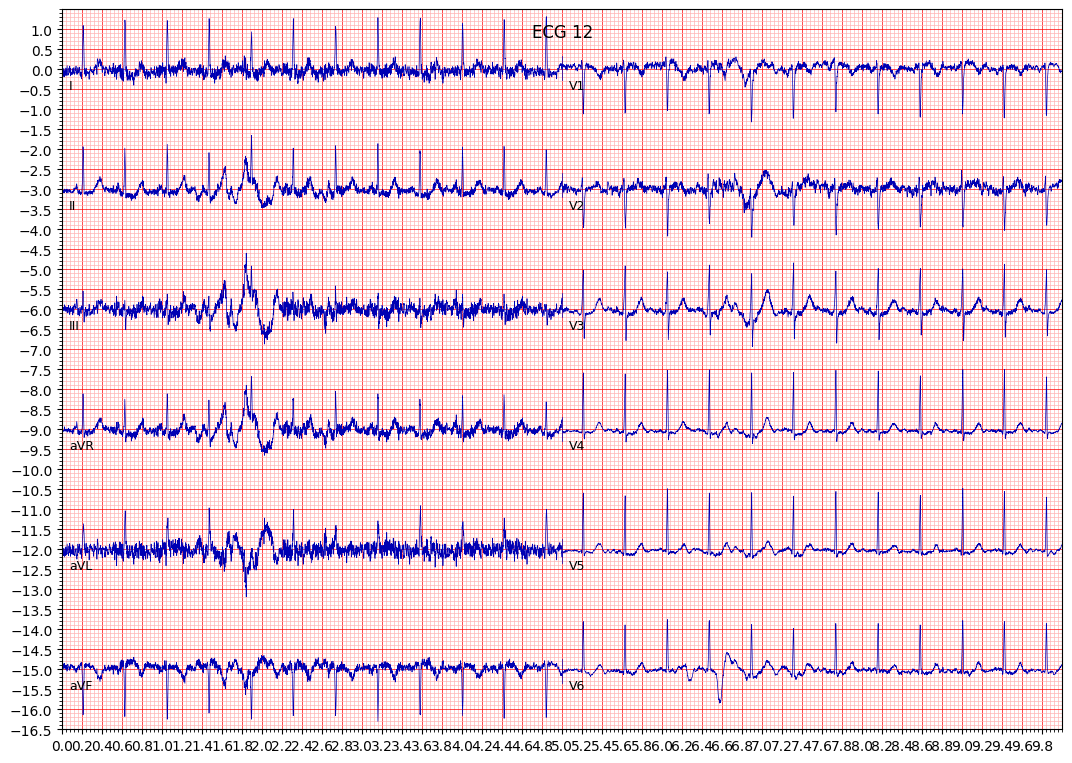

In [ ]:
lead_order = ['I', 'II', 'III', 'AvR', 'AvL', 'AvF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ordered_normalized_data = [scaled_ecg_data[lead] for lead in lead_order]
ecg_plot.plot(ordered_normalized_data, sample_rate = 1000)
plt.savefig('example_ecg.png')
ecg_plot.show()